In [ ]:
# Reference:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# 1. Load MobileNet (smaller ImageNet pre-trained CNN), without classifier
# 2. Train classifier with food pictures
# 3. Fine-tune the last layers and classifier

In [5]:
# Load the images
labels = ['chapati', 'fishball_noodle', 'satay']

train_folder = 'train'
n_train_set = 45

val_folder = 'validation'
n_val_set = 15

In [6]:
from keras.applications import mobilenet

# Each built-in CNN should come with these helper functions
# so that you can correctly use it
mobilenet.preprocess_input?
mobilenet.decode_predictions?

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# preprocessing_function: use MobileNet's built-in function
#                    why: ensures similar input as training
#
# Augmentation (add variety to training set to avoid overfitting):
#   rotation_range: randomly rotate image by some degrees
#   horizontal_flip: randomly flip image side to side (roti prata flip)

train_datagen = ImageDataGenerator(
    preprocessing_function=mobilenet.preprocess_input,
    rotation_range=.25,
    horizontal_flip=True)

# Need to specify supported size for MobileNet
#
# 160x160x3 matches one of the sizes supported by MobileNet
# (the neural network we'll transfer learn from)
img_height = img_width = 160
channels = 3 # RGB (colour images)

X_gen = train_datagen.flow_from_directory('data/train',
                                          target_size=(img_height, img_width),
                                          batch_size=n_train_set)

# Internally keras will do something like this:
# batch1 = next(X_gen) # gets next batch size (45)
# train(batch1)
# batch2 = next(X_gen) # gets next batch size (45)
# train(batch2)

batch = next(X_gen)

# Shuffled dataset from 'data/train' folder
X_train = batch[0] # images
y_train = batch[1] # labels

Found 45 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


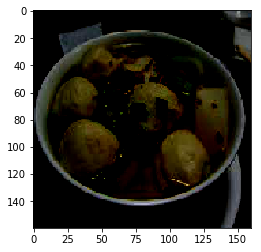

In [8]:
# Output from ImageDataGenerator with optional rotation,
# optional roti prata flip
# and required preprocessing
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [9]:
from keras.applications import mobilenet

# Load MobileNet
mob = mobilenet.MobileNet(input_shape=(img_width, img_height, channels))
mob.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 162, 162, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 80, 80, 32)        0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 82, 82, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
__________

In [10]:
# Without training or transfer learning, let's see predictions
# from original full MobileNet

pred = mob.predict(X_train)
pred_decoded = mobilenet.decode_predictions(pred) # decodes from probabilities

In [11]:
import numpy as np

truth_decoded = [labels[n] for n in np.argmax(y_train, axis=1)]

for t, p in zip(truth_decoded, pred_decoded):
    print('\nTruth:', t)
    print('Predicted:', p)


Truth: fishball_noodle
Predicted: [('n07584110', 'consomme', 0.8475968), ('n07590611', 'hot_pot', 0.1302645), ('n04263257', 'soup_bowl', 0.009432559), ('n02939185', 'caldron', 0.002689592), ('n07579787', 'plate', 0.0025068154)]

Truth: fishball_noodle
Predicted: [('n07579787', 'plate', 0.44112697), ('n04263257', 'soup_bowl', 0.10679346), ('n07875152', 'potpie', 0.079879254), ('n07711569', 'mashed_potato', 0.073397785), ('n07584110', 'consomme', 0.067168094)]

Truth: satay
Predicted: [('n01990800', 'isopod', 0.21453202), ('n02105505', 'komondor', 0.16378537), ('n04111531', 'rotisserie', 0.14767312), ('n02321529', 'sea_cucumber', 0.055840872), ('n07871810', 'meat_loaf', 0.053950656)]

Truth: chapati
Predicted: [('n07880968', 'burrito', 0.12851948), ('n02100735', 'English_setter', 0.10243613), ('n02101556', 'clumber', 0.064956136), ('n01943899', 'conch', 0.054294523), ('n07932039', 'eggnog', 0.03959881)]

Truth: satay
Predicted: [('n07579787', 'plate', 0.7054177), ('n07715103', 'cauliflo

In [12]:
# from keras.applications import vgg16

# Load VGG16 (for fun)
# vgg = vgg16.VGG16()
# vgg.summary()

In [13]:
# 1. Load MobileNet (smaller ImageNet pre-trained CNN), without classifier

featurizer = mobilenet.MobileNet(include_top=False,
                                 input_shape=(img_width, img_height, channels))
featurizer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 162, 162, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 80, 80, 32)        0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 82, 82, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
__________

In [14]:
# Transforming into feature space
# This is the output from conv_pw_13_relu layer of
# our training set (45 images of food)
Z_train = featurizer.predict(X_train)
Z_train

# Later after training
# Z_test = featurizer.predict(X_test)
# pred = model.predict(Z_test) # this is the classifier to train
#

# After after: fine tune
# model2 = Model(featurizer, model) # pseudocode will not work
# model2.compile(...)
# model2.fit(...)


array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 3.0297527 , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 5.5188437 , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 3.2717    , 0.        , ..., 0.        ,
          1.153326  , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          1.1477413 , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 6.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 6.        , 0.3109336 , ..., 0.        ,
          0.        , 0.        ],
         [0.7646074 , 6.        , 6.        , ..., 0.        ,
          0.        , 0.        ],
         [0.18945312, 5.2877693 , 5.3863754 , ..., 1.0342295 ,
          0.        , 0.        ]],

        [[0.    

In [15]:
Z_train[0].shape

(5, 5, 1024)

In [16]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

classifier = Sequential()
classifier.add(Flatten(input_shape=Z_train.shape[1:])) # flatten (5, 5, 1024) to vector
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.5)) # preferred to avoid overfitting
                             # because of small datasets
classifier.add(Dense(3, activation='softmax'))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1638464   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 1,638,659
Trainable params: 1,638,659
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 2. Train classifier with food pictures

import time
from keras.callbacks import TensorBoard, EarlyStopping

tensorboard = TensorBoard(log_dir='./logs/transfer_clf/%d' % time.time())
earlystop = EarlyStopping(patience=0)

classifier.compile(optimizer='sgd', loss='categorical_crossentropy',
                   metrics=['accuracy'])

classifier.fit(Z_train, y_train,
               epochs=20,
               callbacks=[tensorboard, earlystop],
               validation_split=.2)

Train on 36 samples, validate on 9 samples
Epoch 1/20
36/36 [==============================] - 0s 8ms/step - loss: 3.3148 - acc: 0.3611 - val_loss: 14.3272 - val_acc: 0.1111
Epoch 2/20
36/36 [==============================] - 0s 2ms/step - loss: 9.8499 - acc: 0.3889 - val_loss: 14.3272 - val_acc: 0.1111


In [18]:
# Read the test set
# Test set needs same preprocessing, but no augmentation
test_datagen = ImageDataGenerator(
    preprocessing_function=mobilenet.preprocess_input)

X_test_gen = test_datagen.flow_from_directory('data/validation',
                                          target_size=(img_height, img_width),
                                          batch_size=n_val_set)

batch = next(X_test_gen)

X_test = batch[0] # images
y_test = batch[1] # labels

# featurize
Z_test = featurizer.predict(X_test)

# score
score_clf = classifier.evaluate(Z_test, y_test)
print(classifier.metrics_names)
print(score_clf)

Found 15 images belonging to 3 classes.
15/15 [==============================] - 0s 568us/step
['loss', 'acc']
[10.745396614074707, 0.3333333432674408]


In [19]:
pred_clf = classifier.predict_classes(Z_test)
pred_proba = classifier.predict_proba(Z_test)
truth = np.argmax(y_test, axis=1)

for t, p, proba in zip(truth, pred_clf, pred_proba):
    print('\nTruth:', labels[t])
    print('Predicted %s %.3f' % (labels[p], proba[p]))


Truth: fishball_noodle
Predicted chapati 1.000

Truth: satay
Predicted chapati 1.000

Truth: satay
Predicted chapati 1.000

Truth: fishball_noodle
Predicted chapati 1.000

Truth: chapati
Predicted chapati 1.000

Truth: satay
Predicted chapati 1.000

Truth: fishball_noodle
Predicted chapati 1.000

Truth: fishball_noodle
Predicted chapati 1.000

Truth: chapati
Predicted chapati 1.000

Truth: satay
Predicted chapati 1.000

Truth: chapati
Predicted chapati 1.000

Truth: chapati
Predicted chapati 1.000

Truth: chapati
Predicted chapati 1.000

Truth: satay
Predicted chapati 1.000

Truth: fishball_noodle
Predicted chapati 1.000


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(np.argmax(y_test, axis=1), pred_clf))
print(confusion_matrix(np.argmax(y_test, axis=1), pred_clf))

             precision    recall  f1-score   support

          0       0.33      1.00      0.50         5
          1       0.00      0.00      0.00         5
          2       0.00      0.00      0.00         5

avg / total       0.11      0.33      0.17        15

[[5 0 0]
 [5 0 0]
 [5 0 0]]


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
train_pred = classifier.predict_classes(Z_train)

print(classification_report(np.argmax(y_train, axis=1), train_pred))
print(confusion_matrix(np.argmax(y_train, axis=1), train_pred))

             precision    recall  f1-score   support

          0       0.33      1.00      0.50        15
          1       0.00      0.00      0.00        15
          2       0.00      0.00      0.00        15

avg / total       0.11      0.33      0.17        45

[[15  0  0]
 [15  0  0]
 [15  0  0]]


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
# Save for our sanity
classifier.save('transfer_clf.h5')

In [23]:
# 3. Fine-tune the last layers and classifier
# a. Find what layers to fine-tune
# b. Freeze the other layers (set trainable=False)
# c. Fine-tune a combined model 

from keras.models import Model

featurizer = mobilenet.MobileNet(include_top=False,
                                 input_shape=(img_width, img_height, channels))

# Append the classifier we trained earlier to the featurizer
combined_model = Model(inputs=featurizer.input,
                       outputs=classifier(featurizer.output))

combined_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 162, 162, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 80, 80, 32)        0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 82, 82, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
__________

In [24]:
# combined_model.layer returns a list of layers
# we can use numpy indexing on it
#
combined_model.layers[:-7] # everything before last 7 layer

In [25]:
# Freeze all layers before block13
# Block13 has about 7 layers, we need to update them as a block
# (By default all are unfrozen/trainable)

for layer in combined_model.layers[:-7]:
    layer.trainable = False # freeze

combined_model.summary() # trainable parameters reduced

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 162, 162, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 80, 80, 32)        0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 82, 82, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
__________

In [26]:
# Inspect what is frozen (look for the trainable: 'False' setting)
combined_model.get_config()

{'name': 'model_1',
 'layers': [{'name': 'input_3',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 160, 160, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_3'},
   'inbound_nodes': []},
  {'name': 'conv1_pad',
   'class_name': 'ZeroPadding2D',
   'config': {'name': 'conv1_pad',
    'trainable': False,
    'padding': ((1, 1), (1, 1)),
    'data_format': 'channels_last'},
   'inbound_nodes': [[['input_3', 0, 0, {}]]]},
  {'name': 'conv1',
   'class_name': 'Conv2D',
   'config': {'name': 'conv1',
    'trainable': False,
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'linear',
    'use_bias': False,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'co

In [28]:
# 3. Fine tune block 13 and classifier slowly
from keras.optimizers import SGD

tensorboard = TensorBoard(log_dir='./logs/transfer_ft/%d' % time.time())
earlystop = EarlyStopping(patience=5)

# learning rate 0.0001, decay by .9 each weight update
combined_model.compile(optimizer=SGD(lr=1e-3, decay=0.9),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# fit with X_train (not Z_train) because we are running the
# whole model
combined_model.fit(X_train, y_train,
               epochs=20,
               callbacks=[tensorboard, earlystop],
               validation_split=.2)

Train on 36 samples, validate on 9 samples
Epoch 1/20
36/36 [==============================] - 12s 338ms/step - loss: 8.9297 - acc: 0.3889 - val_loss: 14.3272 - val_acc: 0.1111
Epoch 2/20
36/36 [==============================] - 10s 288ms/step - loss: 7.8607 - acc: 0.3889 - val_loss: 14.3272 - val_acc: 0.1111
Epoch 3/20
36/36 [==============================] - 11s 313ms/step - loss: 8.8487 - acc: 0.3889 - val_loss: 14.3272 - val_acc: 0.1111
Epoch 4/20
36/36 [==============================] - 12s 321ms/step - loss: 7.2830 - acc: 0.4722 - val_loss: 14.3272 - val_acc: 0.1111
Epoch 5/20
36/36 [==============================] - 11s 310ms/step - loss: 8.7748 - acc: 0.4167 - val_loss: 14.3272 - val_acc: 0.1111
Epoch 6/20
36/36 [==============================] - 11s 310ms/step - loss: 8.6100 - acc: 0.3611 - val_loss: 14.3272 - val_acc: 0.1111


In [29]:
# score
score_ft = combined_model.evaluate(X_test, y_test)
print(combined_model.metrics_names)
print(score_ft)

# F1 metrics
pred_proba = combined_model.predict(X_test)
pred_ft = np.argmax(pred_proba, axis=1)

print(classification_report(np.argmax(y_test, axis=1), pred_ft))
print(confusion_matrix(np.argmax(y_test, axis=1), pred_ft))

# print truth vs. predictions
truth = np.argmax(y_test, axis=1)
for t, p, proba in zip(truth, pred_ft, pred_proba):
    print('\nTruth:', labels[t])
    print('Predicted %s %.3f' % (labels[p], proba[p]))

15/15 [==============================] - 3s 228ms/step
['loss', 'acc']
[10.745396614074707, 0.3333333432674408]
             precision    recall  f1-score   support

          0       0.33      1.00      0.50         5
          1       0.00      0.00      0.00         5
          2       0.00      0.00      0.00         5

avg / total       0.11      0.33      0.17        15

[[5 0 0]
 [5 0 0]
 [5 0 0]]

Truth: fishball_noodle
Predicted chapati 1.000

Truth: satay
Predicted chapati 1.000

Truth: satay
Predicted chapati 1.000

Truth: fishball_noodle
Predicted chapati 1.000

Truth: chapati
Predicted chapati 1.000

Truth: satay
Predicted chapati 1.000

Truth: fishball_noodle
Predicted chapati 1.000

Truth: fishball_noodle
Predicted chapati 1.000

Truth: chapati
Predicted chapati 1.000

Truth: satay
Predicted chapati 1.000

Truth: chapati
Predicted chapati 1.000

Truth: chapati
Predicted chapati 1.000

Truth: chapati
Predicted chapati 1.000

Truth: satay
Predicted chapati 1.000

Truth: fi

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
combined_model.save('transfer_ft.h5')